In [34]:
import pandas as pd
import requests
import os
import tweepy
import json
import pprint as pp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

# Project Overview

The purpose of this project is to gather, assess, and clean data then act on it through analysis, 
visualization and/or modeling.

This includes:
- Gathering data from 3 different sources using 3 different techniques.
- Detecting and documenting at least 8 data quality issues and 2 data tidiness issues.
- Providing 3 insights and 1 visualization about the clean data
- Creating a 300-600 word document to describe wrangling efforts
- Providing a 250-word minimum report that communicates insights and displays at least 1 visualization from the clean data.

## Gather

This project requires taking files from three different sources:
- On hand file
- Downloading file programmatically
- Using the Twitter API to get tweet information in JSON format

#### Uploading a CSV File On Hand

This is a file provided by Udacity that contains data pertaining to past tweets from WeRateDogs.

In [35]:
# Accessing the file on hand
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [36]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Downloading File Programmatically

This file was downloaded programmatically from Udacity using the requests Python library. It contains predictions for the type of dog displayed in the image associated wih each tweet.

I will write this file to a folder for future use.

In [37]:
# Creating a folder for the image_predictions.tsv file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Accessing the image_predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [38]:
# Writing the image_predictions.tsv file to the folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [39]:
# Assigning to dataframe
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Downloading using Twitter API

Using Twippy library to get JSON data for tweets, then narrowing down to "favorite_count" and "retweet_count".

In [40]:
# DO NOT INCLUDE THIS IN FINAL SUBMISSION
consumer_key = '4vjEjyUHUcbq8KFz5nrwpm6yH'
consumer_secret = 'ZLSLnYQ8sr0rbjCv9ffe9B5yMAP8XYSLUjQnKwM15zHN4MkFgB'
access_token = '1031389456228438017-E79sA6ciDlitu0QWasqogiZ1wB668t'
access_secret = 'FfglqyL9EY55EBrNC5fv0PIkG3fiFvoB42hkiNbrT9ssz'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [41]:
# Convert to list to use in API call
tweet_ids = tweets.tweet_id.tolist()

In [42]:
# Write tweet_json.txt file using JSON data taken from Twitter API
with open ('tweet_json.txt', mode = 'w') as file:
    for tweet_id in tweet_ids:
        try:
            status = api.get_status(tweet_id)
            json_str = json.dumps(status._json)
        except:
            continue
        file.write(json_str + '\n')  

IndentationError: unexpected indent (<ipython-input-42-9555ae1b4287>, line 3)

In [43]:
# Confirm validity of JSON data
with open('tweet_json.txt') as json_file:
    line = json_file.readline()
    tweet = json.loads(line)
    print(tweet)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 892420639486877696, 'id_s

In [44]:
with open('tweet_json.txt') as json_file:
    json_info = pd.DataFrame(columns = ['tweet_id',
                                        'favorite_count',
                                        'retweet_count'])
    for line in json_file:
        tweet = json.loads(line)
        json_info = json_info.append({
            'tweet_id': tweet['id'],
            'favorite_count': tweet['favorite_count'],
            'retweet_count': tweet['retweet_count']           
        }, ignore_index=True)                                        

## Assess

I will use a mix of visual and programmatic checks to determine issues with data quality and tidiness.
There are differing theories on how data quality issues should be classified, however most theories have the following classifications in common: 
- Completeness
- Validity
- Accuracy
- Consistency

In contrast, there is a widely recognized definition of tidy data offered by Hadley Wickham. 
Tidy data should be organized as follows:
1) Each variable should be in one column
2) Each different observation of that variable should be in a different row
3) There should be one table for each "kind" of variable

We'll start with some basic programmatic checks to ensure there are no major and consistent problems with data quality.

#### Programmatic Assessment

I'll take a look at the following to ensure future analysis can be performed without issues:
- Duplicate tweets
- Data types

First, checking for duplicate tweets:

In [45]:
# Check programmatically whether any values in the tweet_id column of the tweets dataframe are duplicated
tweets[tweets.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [46]:
# Check programmatically whether any values in the tweet_id column of the image_recognition dataframe are duplicated
image_predictions[image_predictions.duplicated(['tweet_id'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [47]:
# Check programmatically whether any values in the tweet_id column of the json_info dataframe are duplicated
json_info[json_info.duplicated(['tweet_id'], keep=False)]

,tweet_id,favorite_count,retweet_count


There don't seem to be any duplicate tweets.

Next, taking a look at data types:

In [48]:
# Check data types for the tweets dataframe
tweets.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

The "timestamp" and "retweeted_status_timestamp" data types should be DateTime.

In [49]:
# Check the data types for the image_predictions dataframe
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [50]:
# Checking data types for json_info
json_info.dtypes

tweet_id          object
favorite_count    object
retweet_count     object
dtype: object

The "favorite_count" and "retweet_count" data types should be integers.

#### Visual Assessment

I'll take a look at the three existing dataframes to identify problems with data quality.

In [51]:
# Tweets data layout
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [52]:
#Image Recognition data layout
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [53]:
# Favourite count & Retweet count data layout from JSON
json_info.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38441,8456
1,892177421306343426,32940,6230
2,891815181378084864,24811,4129
3,891689557279858688,41799,8585
4,891327558926688256,39961,9315


After taking a look at the data programmatically, I have identified the following quality and tidiness issues:

#### Quality issues
- Some dog names have not been correctly identified, so they should be changed to 'None' for consistency
- Some dog names labelled as 'None' have actual names in the tweet itself
- Rating numerator incorrect (to be checked programmatically)
- Rating denominator incorrect
- Data format of timestamps (should be datetime format)
- Dog breed needs to be defined as one value for easy analysis
- json_info data columns need to be integers for analysis
- Each dataframe has a different number of rows


#### Tidiness issues
- Dog age (puppo etc.) needs to be made one column
- Dataframes should be merged using "tweet_id" as the unique key


## Clean

### Data Quality Issues

#### Creating Copies of Each Dataframe

First of all, let's create copies of each dataframe for cleaning purposes. This is to avoid altering the data in the original dataframes.

In [54]:
# Create copies of each data frame for cleaning
tweets_clean = tweets.copy()
image_predictions_clean = image_predictions.copy()
json_info_clean = json_info.copy()

#### Define

Firstly, I considered whether or not it is possible to find dog names programmatically from the tweet if they are listed as "None". Upon inspection of the data, it seems the name value is automatically populated by taking the word after "This is" or similar phrases that may be used before stating the dog's name, but I figured it may be possible to find another name by taking the first capitalized word after the first word in a sentence.

Given the variability of language within each tweet, it doesn't seem like a simple job to automate this. 
So I have defined the two data issues and their fix as follows:

- Replace names that start with a non-capitalized letter with "None".
- Replace "None" with dog's name if a dog's name can be found in the tweet manually (first 3 cases to demonstrate ability to do so).

#### Code

In [55]:
# Create HTML to see full tweets to check whether names can be automatically populated
pd.set_option('display.max_colwidth', -1)
tweets_clean.to_html('tweets_clean.html')

In [56]:
# Iterate through rows to find names where the first letter is lowercase, and replace with "None"
for index, name in tweets_clean.iterrows():
    if tweets_clean.name[index].istitle() is False:
        tweets_clean.name[index] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### Test

In [104]:
# Checking whether any names with a lowercase first letter remain
tweets_clean.name.value_counts()

None         735
Charlie      12 
Lucy         11 
Cooper       11 
Oliver       11 
Lola         10 
Tucker       10 
Penny        10 
Winston      9  
Bo           9  
Sadie        8  
Daisy        7  
Buddy        7  
Bailey       7  
Toby         6  
Scout        6  
Oscar        6  
Stanley      6  
Koda         6  
Jax          6  
Leo          6  
Milo         6  
Jack         6  
Finn         5  
Sammy        5  
Larry        5  
Sunny        5  
Dave         5  
George       5  
Louis        5  
            ..  
Gin          1  
Shooter      1  
Oreo         1  
Devón        1  
Bertson      1  
Carper       1  
Rooney       1  
Patch        1  
Ralphy       1  
Jaycob       1  
Ebby         1  
Rambo        1  
Lipton       1  
Kane         1  
Crouton      1  
Pumpkin      1  
Duchess      1  
Snoop        1  
Dot          1  
Noosh        1  
Frönq        1  
Livvie       1  
Peanut       1  
Sojourner    1  
Mabel        1  
Stephanus    1  
Sweet        1  
Pete         1

#### Define

- Replace "None" with dog's name if a dog's name can be found in the tweet manually (first 3 cases to demonstrate ability to do so).

After checking the HTML file of full tweets created earlier, I found the following 3 'None' values for name that could be replaced.
- Index: 30, Name: Tanner
- Index: 35, Name: Howard
- Index: 72, Name: Martha

#### Code

In [58]:
# Replacing those 3 names
tweets_clean.name[30, 35, 72] = 'Tanner', 'Howard', 'Martha'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [59]:
# Checking each new name value
tweets_clean.name[30]

'Tanner'

In [60]:
# Checking each new name value
tweets_clean.name[35]

'Howard'

In [61]:
# Checking each new name value
tweets_clean.name[72]

'Martha'

#### Define

After checking the full tweet HTML file, most incorrect numerators and denominators are down to tweets either not about dogs or with a funny twist (i.e. a devil dog given a 666/10). I'll remove these so they don't mess with analysis results.

- Remove rating numerators below 8 or above 14
- Remove rating denominators that are not 10

#### Code

In [62]:
#Checking current state of rating numerators
tweets_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [63]:
# Removing rating numerators below 8 or above 14
tweets_clean = tweets_clean[tweets_clean.rating_numerator >= 8]
tweets_clean = tweets_clean[tweets_clean.rating_numerator <= 14]

In [65]:
# Checking current state of rating denominators
tweets_clean.rating_denominator.value_counts()

10    2145
11    2   
15    1   
Name: rating_denominator, dtype: int64

In [66]:
# Removing non-10 denominators
tweets_clean = tweets_clean[tweets_clean.rating_denominator == 10]

#### Test

In [64]:
# Checking that no rating numerators have a value other than 10
tweets_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
14    54 
Name: rating_numerator, dtype: int64

In [67]:
# Checking that no rating denominators have a value other than 10
tweets_clean.rating_denominator.value_counts()

10    2145
Name: rating_denominator, dtype: int64

#### Define

- There should only be one dog breed value for easy analysis. Take the most likely dog prediction of the 3 given. If no predictions correspond to dog breeds, set value as "Unknown".

#### Code

In [68]:
# Checking current state of expanded URLs values
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [70]:
# Create new column for "dog_breed" based on first dog breed prediction
image_predictions_clean['dog_breed'] = np.nan

In [71]:
# Populate dog_breed column with most likely breed
for index, row in image_predictions_clean.iterrows():
    if image_predictions_clean.p1_dog[index] == True:
        image_predictions_clean.dog_breed[index] = image_predictions_clean.p1[index]
    elif image_predictions_clean.p2_dog[index] == True:
        image_predictions_clean.dog_breed[index] = image_predictions_clean.p2[index]
    elif image_predictions_clean.p3_dog[index] == True:
        image_predictions_clean.dog_breed[index] = image_predictions_clean.p3[index]
    else: image_predictions_clean.dog_breed[index] = 'Unknown'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel

#### Test

In [72]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


#### Define

- Change 'timestamp' column data type to "Datetime"

#### Code

In [73]:
# Check data type
tweets_clean.dtypes

tweet_id                      int64  
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

In [74]:
# Change column to datetime
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])
tweets_clean['retweeted_status_timestamp'] = pd.to_datetime(tweets_clean['retweeted_status_timestamp'])

#### Test

In [75]:
# Check new data types for 'timestamp' and 'retweeted_status_timestamp'
tweets_clean.dtypes

tweet_id                      int64         
in_reply_to_status_id         float64       
in_reply_to_user_id           float64       
timestamp                     datetime64[ns]
source                        object        
text                          object        
retweeted_status_id           float64       
retweeted_status_user_id      float64       
retweeted_status_timestamp    datetime64[ns]
expanded_urls                 object        
rating_numerator              int64         
rating_denominator            int64         
name                          object        
doggo                         object        
floofer                       object        
pupper                        object        
puppo                         object        
dtype: object

In [76]:
# Check data frame
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Define

- Change json_info data column data types to integer

#### Code

In [77]:
# Changing json_info data column data types to integer
json_info_clean[['favorite_count','retweet_count']] = json_info_clean[['favorite_count','retweet_count']].apply(pd.to_numeric)

#### Test

In [78]:
# Checking data types
json_info_clean.dtypes

tweet_id          object
favorite_count    int64 
retweet_count     int64 
dtype: object

### Data Tidiness Issues

#### Define

- Dog age (puppo etc.) needs to be made one column

This can be done using the following method:

1. Create a new column called "Dog age"
2. Populate this column with the non-'None' value from the 'doggo', 'floofer', 'pupper' and 'puppo' columns
3. If there is no non-'None' value, assign 'Unknown'
4. Drop existing 'doggo', 'floofer', 'pupper' and 'puppo' columns

#### Code

In [103]:
# Change dog age to one column
values = ['doggo', 'floofer', 'pupper', 'puppo']

tweets_clean['dog_age'] = tweets_clean[values].replace('None', np.nan).ffill(axis=1).iloc[:,-1].fillna('Unknown')

KeyError: "['doggo' 'floofer' 'pupper' 'puppo'] not in index"

In [81]:
# Drop unnecessary 'dog age' columns
tweets_clean = tweets_clean.drop(values, 1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_age
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,Unknown
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,Unknown
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,Unknown
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,Unknown
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,Unknown
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,Unknown
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,Unknown
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,Unknown
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,Unknown
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying internati

#### Test

In [105]:
# Check whether columns have been dropped
tweets_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_age
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,Unknown
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,Unknown
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,Unknown
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,Unknown
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,Unknown
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,Unknown
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,Unknown
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,Unknown
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,Unknown
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying internati

#### Define

- Merge all 3 existing DataFrames using "tweet_id" as the unique ID.
- From the image recognition file, only include the column necessary for analysis ("dog_breed")

#### Code

In [82]:
# Merge tweets_clean and json_info_clean on "tweet_id"
tweets_json_clean = pd.merge(tweets_clean, json_info_clean, on='tweet_id')
tweets_json_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_age,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,Unknown,38441,8456
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,Unknown,32940,6230
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,Unknown,24811,4129
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,Unknown,41799,8585
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,Unknown,39961,9315
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,Unknown,20058,3087
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,Unknown,11739,2053
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,Unknown,64911,18767
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,Unknown,27573,4238
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http:

In [83]:
# Create subset of image_recognition dataframe that only includes tweet_id and dog_breed
dog_breeds = image_predictions_clean.loc[:, ['tweet_id', 'dog_breed']]
dog_breeds.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [84]:
# Merging dog_breeds with tweet and JSON info
tweets_full_info_clean = pd.merge(tweets_json_clean, dog_breeds, on='tweet_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_age,favorite_count,retweet_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,Unknown,38441,8456,Unknown
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,Unknown,32940,6230,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,Unknown,24811,4129,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,Unknown,41799,8585,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,Unknown,39961,9315,basset


#### Test

In [106]:
# Check new dataframe
tweets_full_info_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_age,favorite_count,retweet_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,Unknown,38441,8456,Unknown
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,Unknown,32940,6230,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,Unknown,24811,4129,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,Unknown,41799,8585,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,Unknown,39961,9315,basset


### Final Cleanup

Before we begin our analysis, we should neaten up the dataframe for easy analysis.

- Delete columns that won't be used in final analysis.
- Rename columns to be easier to understand

#### Define

- Delete unnecessary columns
('source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_denominator')

#### Code

In [86]:
# Get list of columns
print(tweets_full_info_clean.columns.tolist())

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_age', 'favorite_count', 'retweet_count', 'dog_breed']


In [87]:
# Remove unnecessary columns
tweets_final = tweets_full_info_clean.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 
                                           'retweeted_status_id', 'retweeted_status_user_id',
                                          'retweeted_status_timestamp', 'expanded_urls',
                                          'rating_denominator'], 1)

,tweet_id,timestamp,text,rating_numerator,name,dog_age,favorite_count,retweet_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,Phineas,Unknown,38441,8456,Unknown
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,Tilly,Unknown,32940,6230,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,Archie,Unknown,24811,4129,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,Darla,Unknown,41799,8585,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,Franklin,Unknown,39961,9315,basset


In [88]:
# Rename 'rating_numerator' column to 'rating'
tweets_final = tweets_final.rename(index=str, columns={"rating_numerator": "rating"})

,tweet_id,timestamp,text,rating,name,dog_age,favorite_count,retweet_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,Phineas,Unknown,38441,8456,Unknown
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,Tilly,Unknown,32940,6230,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,Archie,Unknown,24811,4129,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,Darla,Unknown,41799,8585,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,Franklin,Unknown,39961,9315,basset


#### Test

In [ ]:
# Check new dataframe
tweets_full_info_clean.head()

### Saving the Final Clean Dataframe

Having undertaken all the previously defined data quality and tidiness fixes, I'll now save the final dataframe to a CSV file for analysis.

In [89]:
# Save final DataFrame to CSV
tweets_final.to_csv('twitter_archive_master', encoding='utf-8', index=False)

## Analysis

Now that the dataframe has been cleaned for analysis, 
I'd like to conduct some exploratory analysis into the following:

- Most common dog breeds
- Whether certain dog breeds score more highly than others
- If there is any relationship between rating in the tweet and "favourite" or "retweet" count
- Whether ratings have increased or decreased over time

#### Most Common Dog Breeds

Let's take a look at the most common dog breeds and plot their count. 
Since there are so many different dog breeds in the dataset, I will only plot the top 10 most common.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


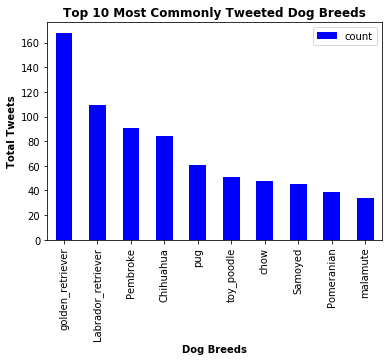

In [90]:
# DataFrame containing the 10 most common dog breeds (including 'Unknown')
g1_subset = tweets_final.groupby(['dog_breed'])['tweet_id'].agg(
    {"count": len}).sort_values(
    "count", ascending=False).head(11).reset_index()

# Removing 'Unknown' from dog breed
g1_subset = g1_subset.iloc[1:]

# Setting index to 'dog_breed' so labels show up in bar plot
g1_subset.set_index('dog_breed', drop=True, inplace=True)
                                        
# Function to plot most common dog breeds
def most_common_dog_breeds():
    g1_subset.plot(kind='bar',rot=0, color=['b', 'g'])
    plt.xticks(rotation=90)
    axes = plt.gca()
    axes.set_xlabel('Dog Breeds', fontdict=dict(weight='bold'))
    axes.set_ylabel('Total Tweets', fontdict=dict(weight='bold'))
    plt.title('Top 10 Most Commonly Tweeted Dog Breeds', fontdict=dict(weight='bold'))
    
most_common_dog_breeds()

The most popular dogs on WeRateDogs are Golden Retrievers, followed by Labrador retrievers and Pembrokes.

#### Average Dog Breed Rating

Next, let's take a look at the average rating for each dog breed.

In [92]:
# Create DataFrame subset including only dog breeds with 10+ tweets
dog_breed_counts = tweets_final['dog_breed'].value_counts()
dog_breed_list = dog_breed_counts[dog_breed_counts > 9].index.tolist()
g2_subset = tweets_final[tweets_final['dog_breed'].isin(dog_breed_list)]

# Find mean rating for dog breeds with 10+ tweets
g2_subset = g2_subset.groupby(['dog_breed']).mean()
g2_subset = g2_subset.sort_values(['rating'], ascending=False)

# Find top 10 highest rated breeds
g2_subset_top10 = g2_subset.head(10)

# Find bottom 10 highest rated breeds
g2_subset_bottom10 = g2_subset.tail(10)

def top10_dog_breeds():
    g2_subset_top10['rating'].plot(kind='bar',rot=0, color=['b', 'g'])
    plt.xticks(rotation=90)
    axes = plt.gca()
    axes.set_ylim([9.5,12])
    axes.set_xlabel('Dog Breeds', fontdict=dict(weight='bold'))
    axes.set_ylabel('Average Rating', fontdict=dict(weight='bold'))
    plt.title('Top 10 Highest Rated Dog Breeds (10+ tweets)', fontdict=dict(weight='bold'))

def bottom10_dog_breeds():
    g2_subset_bottom10['rating'].plot(kind='bar',rot=0, color=['b', 'g'])
    plt.xticks(rotation=90)
    axes = plt.gca()
    axes.set_ylim([9.5,12])
    axes.set_xlabel('Dog Breeds', fontdict=dict(weight='bold'))
    axes.set_ylabel('Average Rating', fontdict=dict(weight='bold'))
    plt.title('Bottom 10 Lowest Rated Dog Breeds (10+ tweets)', fontdict=dict(weight='bold'))

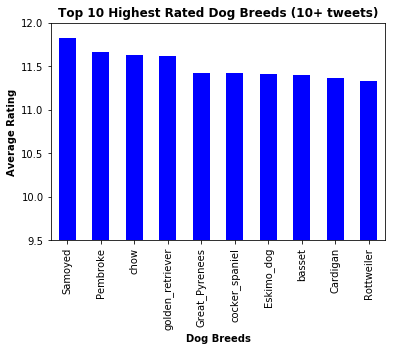

In [93]:
top10_dog_breeds()

Of the dog breeds that are featured in 10 or more tweets, the highest rated breeds are Samoyed, Pembroke and Chow respectively.

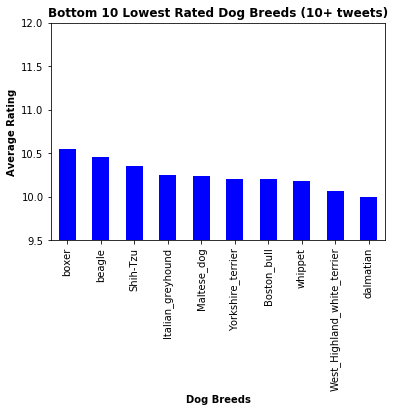

In [94]:
bottom10_dog_breeds()

Of the dog breeds featured in 10 or more tweets, the bottom rated breeds were 

#### Relationship Between Rating and Favourite/Retweet Count

- Examining the relationsip between rating and favourite/retweet count

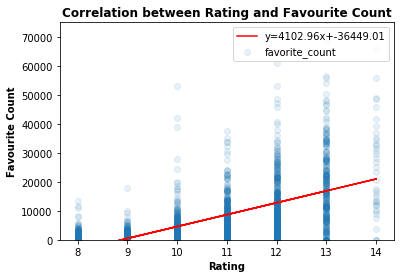

In [99]:
# Correlation between Rating/Favourite Count
def rating_favourite_count():
    x = tweets_final['rating']
    y = tweets_final['favorite_count']

    # Regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    
    # Plot graph
    plt.scatter(x, y, alpha=0.1)
    plt.legend(loc='upper right')
    axes = plt.gca()
    axes.set_xlabel('Rating', fontdict=dict(weight='bold'))
    axes.set_ylabel('Favourite Count', fontdict=dict(weight='bold'))
    axes.set_ylim([0, 75000])
    plt.title('Correlation between Rating and Favourite Count', fontdict=dict(weight='bold'))
    
rating_favourite_count()

The vast majority of favourite count values come under 75000, so I have chosen to cut the y-axis at that point to make the correlation more clear. There is a clear positive correlation between rating and favourite count. Investigation into whether this is statistically signficant is beyond the scope of this project.

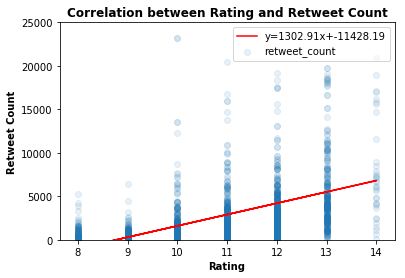

In [101]:
# Correlation between Rating/Retweet Count
def rating_retweet_count(): 
    
    x = tweets_final['rating']
    y = tweets_final['retweet_count']

    # Regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    
    # Plot graph
    plt.scatter(x, y, alpha=0.1)
    plt.legend(loc='upper right')
    axes = plt.gca()
    axes.set_xlabel('Rating', fontdict=dict(weight='bold'))
    axes.set_ylabel('Retweet Count', fontdict=dict(weight='bold'))
    axes.set_ylim([0, 25000])
    plt.title('Correlation between Rating and Retweet Count', fontdict=dict(weight='bold'))
    
rating_retweet_count()

The vast majority of favourite count values come under 25000, so I have chosen to cut the y-axis at that point to make the correlation more clear. There is a clear positive correlation between rating and retweet count. Investigation into whether this is statistically signficant is beyond the scope of this project.

The results of this analysis are quite surprising to me. Are ratings taken that seriously on WeRateDogs, to the extent that they impact the number of times a tweet is favourited or retweeted? If this were a data exploration project, I'd want to look deeper into factors that affect favourite and retweet counts.

#### Changes in Average Rating Over Time

- Investigation into whether average ratings have changed over time

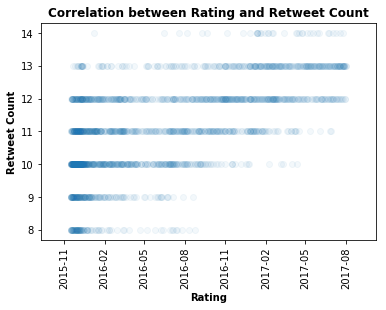

In [102]:
# Plotting Average Rating over Time
def average_rating_over_time():
    
    x = list(tweets_final['timestamp'].values)
    y = tweets_final['rating']
    
    # Plot graph
    plt.scatter(x, y, alpha=0.05)
    plt.xticks(rotation=90)
    axes = plt.gca()
    axes.set_xlabel('Rating', fontdict=dict(weight='bold'))
    axes.set_ylabel('Retweet Count', fontdict=dict(weight='bold'))
    plt.title('Correlation between Rating and Retweet Count', fontdict=dict(weight='bold'))
    
average_rating_over_time()

Ratings seem to have become higher as time goes on.